# CBIR

## Adquisión de datos y selección del dataset

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [35]:
diccionario_cifar10=unpickle('data_batch_1')
# Obtener datos y etiquetas
datos = diccionario_cifar10[b'data']
etiquetas = diccionario_cifar10[b'labels']
# Convertir los datos a un formato adecuado para la visualización (por ejemplo, 32x32x3 para imágenes CIFAR-10)
datos_reshaped = datos.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

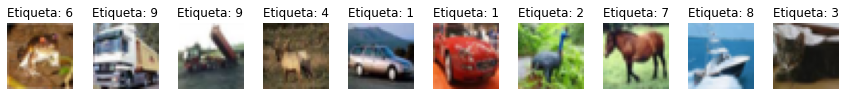

In [54]:
# Función para visualizar varias imágenes
def mostrar_imagenes(images, etiquetas, cantidad=10):
    plt.figure(figsize=(15, 7))
    for i in range(cantidad):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i])
        plt.title(f"Etiqueta: {etiquetas[i]}")
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes
mostrar_imagenes(datos_reshaped, etiquetas)

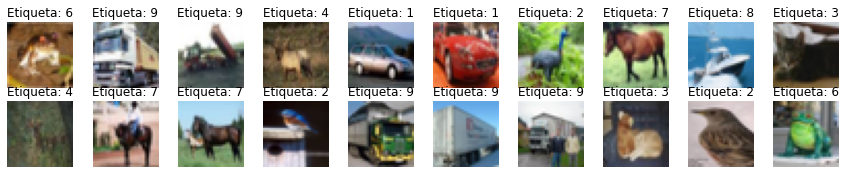

In [48]:
# Mostrar algunas imágenes
mostrar_imagenes(datos_reshaped, etiquetas, cantidad=20)

Las imágenes salen borrosas porque son de 32x32 muy pequeñas. Trabajamos con las imágenes originales y ya vemos si al ser borrosas influyen o no en los resultados. Con el código anterior podemos visualizar como máximo 50 imágenes. 

In [40]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2

#podemos probar mejorar las imágenes aplicándole filtros, y así comparar los resultados para verificar si influye o no estar borrosa 
def aplicar_filtro_laplaciano(images, etiquetas, cantidad=10):
    plt.figure(figsize=(15, 7))
    for i in range(cantidad):
        imagen = images[i]
        imagen_laplaciana = cv2.Laplacian(imagen, cv2.CV_64F)
        imagen_nitida = imagen - 0.5 * imagen_laplaciana  # Ajusta el factor según sea necesario
        imagen_nitida = np.clip(imagen_nitida, 0, 255).astype(np.uint8)

        plt.subplot(5, 10, i + 1)
        plt.imshow(imagen_nitida)
        plt.title(f"Etiqueta: {etiquetas[i]}")
        plt.axis('off')
    plt.show()

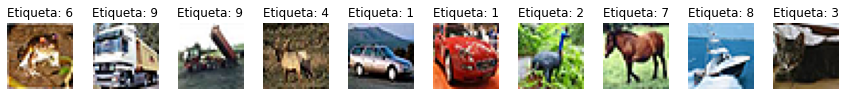

In [43]:
aplicar_filtro_laplaciano(datos_reshaped, etiquetas, cantidad=10)

Como nos vienen 10 clases con 1000 imágenes de cada clase, vamos a reducir nuestro conjunto de dataset a 100 imágenes por clase.

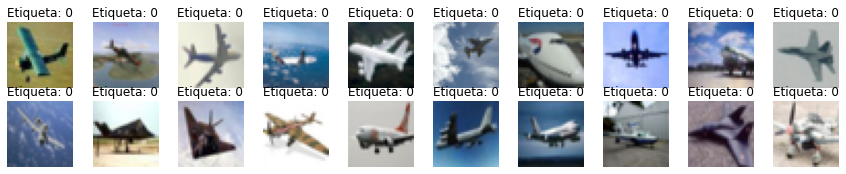

In [51]:
# Establecer la semilla para reproducibilidad
np.random.seed(42)

# Seleccionar aleatoriamente 100 imágenes de cada clase
num_imagenes_por_clase = 100
imagenes_seleccionadas = []
etiquetas_seleccionadas = []

for clase in range(10):
    indices_clase = np.where(np.array(etiquetas) == clase)[0]
    indices_seleccionados = np.random.choice(indices_clase, num_imagenes_por_clase, replace=False)
    imagenes_seleccionadas.extend(datos_reshaped[indices_seleccionados])
    etiquetas_seleccionadas.extend([clase] * num_imagenes_por_clase)

# Convertir a numpy array
imagenes_seleccionadas = np.array(imagenes_seleccionadas)
etiquetas_seleccionadas = np.array(etiquetas_seleccionadas)

# Mostrar las imágenes seleccionadas
mostrar_imagenes(imagenes_seleccionadas, etiquetas_seleccionadas, cantidad=20)

Ahora que ya tenemos las imágenes de cada clase ordenadas, vamos a ver qué clases tenemos obsevando una imagen de cada clase.

In [52]:
def mostrar_una_imagen_por_clase(datos, etiquetas):
    clases_unicas = np.unique(etiquetas)

    plt.figure(figsize=(15, 7))
    for i, clase in enumerate(clases_unicas):
        indice_clase = np.where(np.array(etiquetas) == clase)[0][0]
        plt.subplot(1, len(clases_unicas), i + 1)
        plt.imshow(datos[indice_clase])
        plt.title(f"Clase: {clase}")
        plt.axis('off')
    plt.show()

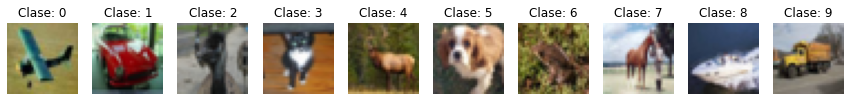

In [53]:
mostrar_una_imagen_por_clase(imagenes_seleccionadas, etiquetas_seleccionadas)

En efecto, tenemos las clases que se nos indicaban en la referencia: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco y camión. 

## Extracción de características